In [1]:
%matplotlib inline

# 14:  Going Deeper---The Mechanics of TensorFlow

In this chapter, we will now shift our focus squarely on to TensorFlow itself, and explore in detail the impressive mechanics and features that TensorFlow offers:

* Key features and advantages of TensorFlow
* TensorFlow ranks and tensors
* Understanding and working with TensorFlow graphs
* Working with TensorFlow variables
* TensorFlow operations with different scopes
* Common tensor transformations: working with ranks, shapes and types
* Transforming tensors as multi-dimensional arrays
* Saving and restoring a model in TensorFlow
* Visualising neural network graphs with TensorBoard

We will stay hands-on in this chapter, of course, and implement graphs throughout the chapter to explore the main TensorFlow features and concepts.  Along the way, we will also revisit a regression model, explore neural network graph visualisation with TensorBoard, and suggest some ways that you could explore visualising more of the graphs that you'll make through this chapter.

## TensorFlow ranks and tensors

Tensors are a generalizable mathematical notation for multi-dimensional arrays holding data values, where the dimensionality of a tensor is typically referred as its rank.

To make the concept of a **tensor** more intuitive, consider the following figure, which represents tensors of rank 0 and 1 in the first row, and tensors of ranks 2 and 3 in the second row:

<img src="images/14_01.png" style="width:500px">

## How to get the rank and shape of a tensor

`tf.rank` will get the rank of a tensor.  It will return a tensor as output.

If `X` is a tensor, we can get its shape by using `X.get_shape()`, which will return an object of a special class called `TensorShape`.

If we want to index of slice different elements of this object, then we can convert it into a Python list, using the `as_list` method of the tensor class.

The following code example illustrates how to retrieve the rank and shape of the tensor in a TensorFlow session.

In [2]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

# define the computation graph
with g.as_default():
    # define the tensors t1, t2, and t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])
    
    # get the ranks of the tensors t1, t2, and t3
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    # See the following `with` context to see the evaluation of the different r values.
    
    # Get the shapes of the tensors t1, t2, and t3
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print("Shapes:\n{}\n{}\n{}.\n".format(s1, s2, s3))

with tf.Session(graph=g) as sess:
    print("Ranks:\n{}\n{}\n{}.".format(r1.eval(), r2.eval(), r3.eval()))

Shapes:
()
(4,)
(2, 2).

Ranks:
0
1
2.


As we can see, the rank of the `t1` tensor is 0 since it is just a scalar (corresponding to the () shape).
The rank of the `t2` vector is 1, and since it has four elements, its shape is the on-element tuple `(4,)`.
Lastly, the rank of the `2x2` matrix is 3, and its corresponding shape is given by the (2, 2) tuple.

TensorFlow relies on building a computation graph at its core, and it uses this computation graph to derive relationships between tensors from the input all the way to the output.
<img src="images/14_02.png" style="width:500px">

As we can see in the above image, a computation graph is simply a network of nodes.  Each node resembles an operation, which applies a function to its input tensor or tensors and returns zero or more tensors as the output.

The individual steps for building and compiling such a computation graph in TensorFlow are as follows:
1. Instantiate a new, empty computation graph.
2. Add nodes (tensors and oeprations) to the computation graph.
3. Execute the graph:
    - Start a new Session.
    - Initialize the variables in the graph.
    - Run the computation graph in this session.

A graph can be created by calling `tf.Graph()`, and then the nodes can be added as follows:

In [3]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    
    z = 2*(a-b) + c

In this code, we added nodes to the graph `g` using `with g.as_default()`.

A TensorFlow session is an environment in which the operations and tensors of a grap can be executed.  A session object created by calling `tf.Session` that can receive an existing graph (here, `g`) as an argument, as in `tf.Session(graph=g)`.

After launching a graph in a TensorFlow session, we can execute its nodes; that is, evaluating its tensors or executings its operators.  Evaluating each individual tensor involves calling its `eval` method inside the current session.  When evaluating a specific tensor in the graph, TensorFlow has to execute all the preceding nodes in the graph until it reaches that particular one.  In case there are one or more placeholders, they would need to be fed.

Quite similarly, executing operations can be done using a session's `run` method.  There is also a universal way of running both tensors and operators:  `tf.Session().run()`.  Using this method, multiple tensors and operators can be placed in a list or tuple.  As a result, `tf.Session().run()` will return a list or tuple of the same size.

Here, we will launch the previous graph in a TensorFlow session and evaluate the tensor `z` as follows:

In [4]:
with tf.Session(graph=g) as sess:
    print("2*(a-b)+c ==> {}.".format(sess.run(z)))

2*(a-b)+c ==> 1.


Remember that we define tensors and operations in a computation graph context within TensorFlow.  A TensorFlow session is then used to execute the operations in the graph and fetch and evaluate the results.

Moving on, we will take a deeper look into the different types of nodes that can appear in a computation graph, including placeholders and variables.  Along the way, we will see some other operators that do not return a tensor as the output.

## Placeholders in TensorFlow

Placeholders are predefined tensors with specific types and shapes.

These tensors are added to the computation graph using the `tf.placeholder` function, and they do not contain any data.  However, upon the execution of certain nodes in the graph, these placeholders need to be fed with data arrays.

In the following sections, we will see how to define placeholders in a graph and how to feed them with data values upon execution.

## Defining Placeholders

When we defie placeholders, we need to decide what their shape and type should be, according to the shape and type of the data that will be fed through them upon execution.

Time for an example:  
Here we will define the same graph that was shown in the previous section for evaluating $z = 2\times (a-b) + c$.  This time, however, we use placeholders for the scalars $a$, $b$, and $c$.  Also, we store the intermediate tensors associated with $r_1$ and $r_2$, as follows:

In [5]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    
    r1 = tf_a - tf_b
    r2 = 2*r1
    z = r2 + tf_c

Notice how we set the shapes via `shape=[]` since they are scalars (tensors of rand 0).  In the current book, we always precede the placeholder ojects with `tf_` for clarity and to be able to distinguish them from other tensors.

It is also very straightforward to define placeholders of higher dimensions: for example, a rank 3 placeholder of type `float` and shape `3x4x5` can be defined as `tf.placeholder(dtype=tf.float32, shape=[3, 4, 5])`.

## Feeding placeholders with data

When we execute a node in the graph, we need to create a Python dictionary to feed the values of placeholders with data arrays.  This dictionary is passed as the input argument `feed_dict` to a session's `run` method.

In the previous graph, we added three placeholders of the type `tf.int32` to feed scalrs for compuring `z`.  Now, in order to evaluate the results tensor `z`, we can feed arbitrary integer values (here `1`, `2`, and `3`) to the placeholders as follows:

In [6]:
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1,
           tf_b: 2,
           tf_c: 3}
    print('z: {}.'.format(sess.run(z, feed_dict=feed)))

z: 1.


## Defining placeholders for data arrays with varying batchsizes.

Sometimes, when we are developing a neural network model, we may deal with mini-batches of data that have different sizes.

A useful feature of placeholders is that we can specify `None` for the dimension that is varying in size.  For example, we can create a placeholder of rank 2, where the first dimension is unknown (or may vary), as shown here:

In [7]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None, 2], name='tf_x')
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')

Then we can evaluate `x_mean` with two different inputs, namely `x1` and `x2`, which are NumPy arrays of shape `(5, 2)` and `(10, 2)`, as follows:

In [8]:
import numpy as np

np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1, size=(5,2))
    print('Feeding data with shape: {}.'.format(x1.shape))
    print('Result: {}.'.format(sess.run(x_mean, feed_dict={tf_x: x1})))
    
    x2 = np.random.uniform(low=0, high=1, size=(10,2))
    print('\nFeeding data with shape: {}.'.format(x2.shape))
    print('Result: {}.'.format(sess.run(x_mean, feed_dict={tf_x: x2})))

Feeding data with shape: (5, 2).
Result: [0.62 0.47].

Feeding data with shape: (10, 2).
Result: [0.46 0.49].


## Variables in TensorFlow

In the context of TensorFlow, variables are a special type of tensor object that allows us to store and update the parameters of our models in a TensorFlow session during training.  The following sections explain how we can:
1. define variables in a graph,
2. initialize those variables in a session,
3. organise variables via the so-called variable scope,
4. and re-use existing variables.

TensorFlow variables store the parameters of a model that can be updated during training, for example, the weights in the input, hidden, and output layers of a neural network.  When we define a variable, we need to initalize it with a tensor of values.

TensorFlow provides two ways for defining variables:
1. `tf.Variable(<initial-value>, name="variable-name")`
2. `tf.get_variable(name, ...)`

The first one, `tf.Variable`, is a class that creates an object for a new variable and adds it to the graph.  Note that `tf.Variable` does not have an explicit way to determine `shape` and `dtype`; the shape and type are set to be the same as those of the initial values.

The second option, `tf.get_variable`, can be used to reuse an existing variable with a given name (if the name exists in the graph), or to create a new one if the name does not exist.  Furthermore, `tf.get_variable` provides an explicit way to set `shape` and `dtype`; these parameters are only required when creating a new variable, not reusing existing ones.

The advantage of `tf.get_variable` over `tf.Variable` is two-fold:
1. `tf.get_variable` allows us to reuse existing variables.
2. secondly, it already uses the popular Xavier/Glorot initialization scheme by default.

Besides the initializer, the `get_variable` function provides other parameters to control the tensor, such as adding a regularizer for the variable.  If you are interested in learning more about these parameters, feel free to read the documentation of `tf.get_variable` at <https://www.tensorflow.org/api_docs/python/tf/get_variable>.

### Xavier (or Glorot) initialisation

The general idea behind Xavier initialization is to roughly balance the variance of the gradients across the different layers.  Otherwise, one layer may get too much attention during training while the other layer lags behind.

In either initialization technique, it is important to note that the initial vales are not set until we launch the graph in `tf.Session` and explicity run the initializer operator in that session.

Here is an example of creating a variable object where the initial values are created from a NumPy array.  The `dtype` data type of this tensor is `tf.int64`, which is automatically inferred from its NumPy array input:

In [9]:
import tensorflow as tf
import numpy as np

g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w')
    
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


## Initialising Variables

Tensors that are defined as variables are not allocated in memory and contain no values until they are initialised.  Therefore, before executing any node in the computation graph, we must initialise the variables that are within the path to the node that we want to execute.

TensorFlow provides a function named `tf.global_variables_initializer` that returns an operator for initializing all the variables that exist in a computation graph.  Then executing this operator will initialize the variables as follows:

In [10]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


## Variable Scope.

When we create a variable scope, the name of operations and tensors that are created within that scope are prefixed with that scope, and those scopes can further be nested.

For example, if we have two subnetworks, where each subnetwork has several layers, we can define two scopes named `net_A` and `net_B`, respectively.  Then, each layer layer will we defined within one of these scopes.

Let us see how the variable names will turn out in the following code example:

In [11]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape=(10,4)), name="weights")
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)), name="weights")
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)), name="weights")
    
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


Notice that the variable names are now prefixed with their nested scopes, separated by the forward slash (/) symbol.

For more information about variable scoping, read the documentation at:
* <https://www.tensorflow.org/programmers_guide/variable_scope>, and
* <https://www.tensorflow.org/api_docs/python/tf/variable_scope>.

## Reusing variables:

Let's imagine that we're developing a somewhat complex neural network model that has a classifier whose input data comes from more that one source.  For example, we'll assume that we have data $(X_A, y_A)$ coming from source $A$, and data $(X_B, y_B)$ that comes from source $B$.  In this example, we will design our graph in such a way that it will use the data from only one source as the input tensor to build the network.  Then, we can feed the data from the other source to the same classifier.

In the following example, we assume that data from source $A$ is fed through a placeholder, and source $B$ is the output of a generator network.  We will build the generator network by calling the `build_generator` function within the `generator` scope, then we will add a classifier by calling `build_classifier` within the `classifier` scope:

In [12]:
import tensorflow as tf

### Helper functions ###

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name="weights", shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name="bias", initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name="logits")
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name="b1")
    hidden = tf.add(tf.matmul(data, w1), b1, name="hidden_pre-activation")
    hidden = tf.nn.relu(hidden, name="hidden_activation")
    
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name="w2")
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name="b2")
    output = tf.add(tf.matmul(hidden, w2), b2, name="output")
    return output, tf.nn.sigmoid(output)

### Build the Graph ###

batch_size=64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name="tf_X")
    
    # build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    # build the classifier
    with tf.variable_scope('classifier') as scope:
        # classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        
        # reuse the classifier for generated data
        scope.reuse_variables()
        cls2_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

Notice that we have called the `build_classifier` function 2 times:
* The first call causes the building of the network.
* Then, we call `scope.reuse_variables()` and call that function again.  
As a result, the second call does not create new variables; instead, it reuses the same variables.

Alternatively, we could reuse the variables by specifying the `reuse=True` parameter, as follows:

In [13]:
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name="tf_X")
    
    # build the generator
    with tf.variable_scope("generator"):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    # build the classifier
    with tf.variable_scope("classifier"):
        # classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
    
    with tf.variable_scope("classifier", reuse=True):
        # reuse the classifier for generated data
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

## Building a regression model

Since we have explored placeholders and variables, let us build an example model for regression analysis, where our goal is to implement a linear regression model:

$$
\hat{y} = wx + b
$$

In this model, $w$ and $b$ are the 2 parameters of this simple regression model that need to be defined as variables.  Note that $x$ is the input to the model, which we can define as a placeholder.  Furthermore, for training a regression model, we need to formulate a cost function.  Here, we use the **Mean Squared Error (MSE)** cost function:

$$
MSE = \frac{1}{n}\sum_{i=1}^n\left( y^{(i)} - \hat{y}^{(i)} \right)^{2}
$$

here $y$ is the true value, which is given as the input to this model for training.  Therefore, we need to define $y$ as a placeholder as well.  Finally, $\hat{y}$, is the prediction output, which will be computed using TensorFlow operations---`tf.matmul` and `tf.add`.

The advantage of `tf.add` is that we can provide an additional name for the resulting tensor via the `name` parameter.

Therefore, let us summarise all our tensors with their mathematical notations and coding naming, as follows:
* Input $x$: `tf_x` defined as a placeholder.
* Input $y$: `tf_y` defined as a placeholder.
* Model parameter $w$: `weight` defined as a variable.
* Model parameter $b$: `bias` defined as a variable.
* Model output $\hat{y}$: `y_hat` returned by TensorFow operations to compute the prediction using the regression model.

The code to implement this simple regression model is as follows:

In [14]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    
    # placeholders
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    
    # define the variable (model parameters)
    weight = tf.Variable(tf.random_normal(shape=(1, 1), stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name="bias")
    
    # build the model
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    
    # compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name="cost")
    
    # train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

Now that we have built the graph, our next steps are to create a session to launch the graph and train the model.  But before we go any further, let's see how we can evaluate tensors and execute operations.  We will create a random regression data with one feature, using the `make_random_data` function and visualising the data:

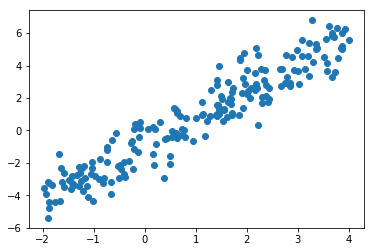

In [15]:
# create a random toy dataset for regression

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for xi in x:
        r = np.random.normal(loc=0.0, scale=1, size=None)
        y.append(r)
    return x, 1.726*x - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, "o")
plt.show()

The above figure shows the random regression data that was generated.

Now we are ready; let us train the previous model:
1. Let's start by creating a TensorFlow session called `sess`.
2. Then, we want to initialise our variables, which we can do with `sess.run(tf.global_variables_initializer())`
3. Create a `for` loop to
    - execute the train operator, and
    - calculate the training cost at the same time.

Let us combine the two tasks, the first to execute an operator, and the second to evaluate a tensor, into one `sess.run` method call.  The code for this is as follows:

Epoch    0: 11.9662.
Bias: 0.0014, Weight: -0.2338.
______________________________
Epoch   50: 6.4436.
Bias: 0.0471, Weight: 0.2834.
______________________________
Epoch  100: 3.8575.
Bias: 0.0540, Weight: 0.6387.
______________________________
Epoch  150: 2.6160.
Bias: 0.0365, Weight: 0.8845.
______________________________
Epoch  200: 1.9946.
Bias: 0.0043, Weight: 1.0560.
______________________________
Epoch  250: 1.6630.
Bias: -0.0364, Weight: 1.1770.
______________________________
Epoch  300: 1.4699.
Bias: -0.0814, Weight: 1.2635.
______________________________
Epoch  350: 1.3458.
Bias: -0.1280, Weight: 1.3265.
______________________________
Epoch  400: 1.2581.
Bias: -0.1745, Weight: 1.3732.
______________________________
Epoch  450: 1.1914.
Bias: -0.2199, Weight: 1.4087.
______________________________
Epoch  500: 1.1381.
Bias: -0.2634, Weight: 1.4363.
______________________________
Epoch  550: 1.0940.
Bias: -0.3047, Weight: 1.4584.
______________________________
Epoch  600: 1.0570.

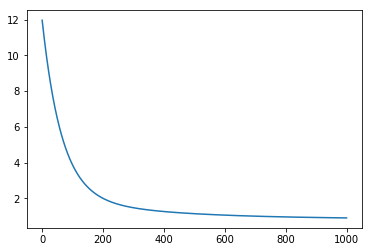

In [16]:
# train/test splits
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 1000
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    # train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: x_train, tf_y: y_train})
        
        training_costs.append(c)
        if not e % 50:
            print("Epoch {:4d}: {:.4f}.".format(e, c))
            print("Bias: {:.4f}, Weight: {:.4f}.".format(sess.run(bias), sess.run(weight)[0][0]))
            print("{:_^30}".format(""))

plt.plot(training_costs)
plt.show()

the code generates the above graph that shows the training costs after each epoch.

## Executing objects in a TensorFlow graph using their names.

Executing variables and operators by their names is very useful in many scenarios.  For example, we may develop a model in a separate module; and thus the variables are not avalable in a different Python scope according to Python scoping rules.  However, if we have a graph, we can execute the nodes of the graph using their **names in the graph.**

This can be done easily by changing the `sess.run` method from the previous code example, using the variable name of the **cost** in the graph rather than the Python variable `cost` by changing:  
`sess.run([cost, train_op], ...)` to `sess.run(['cost:0', 'train_op'], ...)`.

In [17]:
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    # first, run the variables initializer
    sess.run(tf.global_variables_initializer())
    
    # train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], feed_dict={'tf_x:0': x_train, 'tf_y:0': y_train})
        training_costs.append(c)
        if e%50 == 0:
            print('Epoch {:4d}, {:.4f}.'.format(e, c))

Epoch    0, 11.9662.
Epoch   50, 6.4436.
Epoch  100, 3.8575.
Epoch  150, 2.6160.
Epoch  200, 1.9946.
Epoch  250, 1.6630.
Epoch  300, 1.4699.
Epoch  350, 1.3458.
Epoch  400, 1.2581.
Epoch  450, 1.1914.


Notice that we are evaluating the cost by its name, which is `'cost:0'`, and executing the train operator by its name: `'train_op'`.  Also, in `feed_dict`, instead of using `tf_x: x_train`, we are using `'tf_x:0': x_train`.

Notice that TensorFlow adds a suffix `':0'` to the name of the tensors.  However, the names of operators do not have any suffix like that.

## Saving and Restoring a model in TensorFlow.

Once the execution of the preceding statements are finished and we exit the `tf.Session` environment, all the variables and their allocated memories are freed.

One solution is to train a model, and as soon as the training is finished, we can feed it our test set.  However, this is not a good approach since deep neural network models are typically trained over multiple hours, days, or even weeks.

The best approach, is to save the trained model for future use.  For this purpose, we need to add a new node to the graph, and instance of the `tf.train.Saver` class, which we call `saver`.

In the following code, we are adding `saver` to the graph `g`, then we retrain the model, and finally make a call to `saver.save()` to save the model as follows:

In [18]:
with g.as_default():
    saver = tf.train.Saver()

    n_epochs = 500
    training_costs = []
    with tf.Session(graph=g) as sess:
        sess.run(tf.global_variables_initializer())
        
        # train the model for n epochs
        for e in range(n_epochs):
            c, _ = sess.run([cost, train_op], feed_dict={tf_x: x_train, tf_y: y_train})
            
            training_costs.append(c)
            if not e % 50:
                print("Epoch {:4d} <---> {:.4f}.".format(e, c))
        
        saver.save(sess, "./trained-model")

Epoch    0 <---> 11.9662.
Epoch   50 <---> 6.4436.
Epoch  100 <---> 3.8575.
Epoch  150 <---> 2.6160.
Epoch  200 <---> 1.9946.
Epoch  250 <---> 1.6630.
Epoch  300 <---> 1.4699.
Epoch  350 <---> 1.3458.
Epoch  400 <---> 1.2581.
Epoch  450 <---> 1.1914.


As a result of this new statement, three files are created with the extensions:
* `.data`
* `.index`
* `.meta`

TensorFlow uses Protocol Buffers, which is a language-neutral way for serializing structured data.

Restoring a trained model requires two steps:
1. Rebuild the graph that has the same nodes and names as the saved model.
2. Restore the saved variables in a new `tf.Session` environment.

All of the information regarding the graph is saved as metadata in the file with the `.meta` extension.  Using the following code, we rebuild the graph by importing it from the `meta` file:

In [19]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph("./trained-model.meta")

The `tf.train.import_meta_graph` function recreates the graph that is saved in the `./trained-model.meta` file.  After recreating the graph, we can use the `new_saver` object to restore the parameters of the model in that session and execute it.  The complete code to run the model on a test set is as follows:

In [20]:
import tensorflow as tf
import numpy as np

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("./trained-model.meta")
    new_saver.restore(sess, "./trained-model")
    
    y_pred = sess.run("y_hat:0", feed_dict={"tf_x:0": x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


Note that we evaluated the $\hat{y}$ tensor by its name that was given previously: `y_hat:0`.  Also, we needed to feed the values for the `tf_x` placeholder, which is also done by its name: `'tf_x:0'`.  In this case, there is no need to feed the values for the true $y$ values.  This is because executing the `y_hat` node does not depend on `tf_y` in the computation graph that we built.

Now, let us visualize the predictions as follows:

INFO:tensorflow:Restoring parameters from ./trained-model


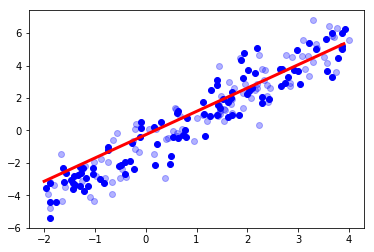

In [21]:
import matplotlib.pyplot as plt

x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("./trained-model.meta")
    new_saver.restore(sess, "./trained-model")
    
    y_arr = sess.run("y_hat:0", feed_dict={"tf_x:0": x_arr})

plt.figure()
plt.plot(x_train, y_train, "bo")
plt.plot(x_test, y_test, "bo", alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], "-r", lw=3)
plt.show()

The above graph contains both the training data and test data.

Since the training stage of large models can take several hours to days, we can break the training phase into smaller tasks.  For example, if the intended number of epochs is 100, we can break it into 25 tasks, where each task would run 4 epochs one after the other.  For this purpose, we can save the trained model and restore it in the next task.

## Transforming Tensors as multi-dimensional data arrays

In this section, we will explore a selection of operators that can be used to transform tensors.  Note that some of these operators work very similar to NumPy array transformations.  However, when we are dealing with tensors with ranks higher than 2, we need to be careful in using such transformation, for example, the transpose of a tensor.

We use `tf.get_shape` to get the shape of an array.

In [22]:
import tensorflow as tf
import numpy as np

g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                    [4., 5., 6., 6.5],
                    [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name="T1")
    print(T1)
    s = T1.get_shape()
    print("The shape of T1 is {}.".format(s))
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
The shape of T1 is (3, 4).
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


We cannot slice or index `s` for creating `T3`, therefore, we converted `s` into a regular Python list by `s.as_list()` and then used the usual indexing conventions.

Now, let us see how we can reshape tensors.  In TensorFlow, we use the function `tf.reshape` to reshape a tensor.  As is the case for Numpy, one dimension can be set to `-1` so that the size of the new dimension will be inferred based on the total size of the array and the other remaining dimension that are specified.

In the following code, we reshape the tensor `T1` to `T4` and `T5`, both of which have rank 3.

In [23]:
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name="T4")
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3, -1], name="T5")
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


Now, let us print the elements of `T4` and `T5`:

In [24]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


The `tf.transpose` function is used to transpose tensors in TensorFlow, and in addition to a regular transpose operation, we can change the order of the dimensions in any way we want by specifying the order in `perm=[...]`.  Here follows an example:

with g.as_default():
    T6 = tf.transpose(T5, perm=[2,1,0], name="T6")
    print(T6)
    
    T7 = tf.transpose(T5, perm=[0,2,1], name="T7")
    print(T7)

with tf.Session(graph=g) as sess:
    print("T6 = {}.".format(sess.run(T6)))
    print("T7 = {}.".format(sess.run(T7)))

Next, we can also split a tensor into a list of subtensors using the `tf.split` function as follows:

In [25]:
with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2, axis=2, name="T8")
    print(t5_split)

with tf.Session(graph=g) as sess:
    print("T8:0 =\n{}.".format(sess.run("T8:0")))
    print("{:_^20}".format(""))
    print("T8:1 =\n{}.".format(sess.run("T8:1")))

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]
T8:0 =
[[[1. 2.]
  [4. 5.]
  [7. 8.]]].
____________________
T8:1 =
[[[3.  3.5]
  [6.  6.5]
  [9.  9.5]]].


It is important to note that the output is not a tensor object anymore; rather, it is a list of tensors.  The name of these subtensors are `'T8:0'` and `'T8:1'`.

Another useful transformation is the concatenation of multiple tensors.  If we have a list of tensors with the same shape and `dtype`, we can combine them into one big tensor using the `tf.concat` function.  An example is given in the following code:

In [26]:
g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=(5,1), dtype=tf.float32, name="t1")
    t2 = tf.zeros(shape=(5,1), dtype=tf.float32, name="t2")
    print(t1)
    print(t2)
    
    t3 = tf.concat([t1, t2], axis=0, name="t3")
    t4 = tf.concat([t1, t2], axis=1, name="t4")
    print(t3)
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


Let us print the values of these concatenated tensors:

In [27]:
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print("{:_^30}".format(""))
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
______________________________
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Utilizing control flow mechanics in building graphs:

TensorFlow provides a mechanism for making decisions when building a graph.  However, there are some subtle differences when we use Python's control flow statements compared to TensorFlow's control flow functions, when constructing computation graphs.

To illustrate these differences with wome simple code examples, let us consider implementing the following equation in TensorFlow:

$$
\mathrm{res} = \begin{cases}
x + y & \mathrm{if\ } x < y \\
x - y & \mathrm{otherwise} \\
\end{cases}
$$

In the following code, we may naively use Python's `if` statement to build a graph that corresponds to the preceding equation:

In [29]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name="tf_x")
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name="tf_y")
    
    if x < y:
        res = tf.add(tf_x, tf_y, name="result_add")
    else:
        res = tf.subtract(tf_x, tf_y, name="result_sub")
    
    print("Object: {}.".format(res))

with tf.Session(graph=g) as sess:
    print("x < y: {} --> Result: {}.".format(x<y, res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})))
    
    x, y = 2.0, 1.0
    print("x < y: {} --> Result: {}.".format(x<y, res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})))

Object: Tensor("result_add:0", dtype=float32).
x < y: True --> Result: 3.0.
x < y: False --> Result: 3.0.


The above shows the result of the naïve coding.  Note that the `res` object is a tensor named `result_add:0`.  It is very important to understand that in the previous mechanism, the computation has only one branch associated with the addition operator, and the subtract operator has not been called.

The TensorFlow computation graph is static, which means that once the computation graph is built, it remains unchanged during the execution process.  So, even when we change the values of `x` and `y` and feed the new values to the graph, these new tensors will go through the same path in the graph.  Therefore, in both cases, we see the same output `3.0`, for `{x,y} = {2,1}` and `{x,y} = {1,2}`.

Now, let us use the control flow mechanism in TensorFlow.  In the following code, we implement the previous equation using the `tf.cond` function instead of Python's `if` statement.

In [31]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name="tf_x")
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name="tf_y")
    res = tf.cond(tf_x < tf_y,
                 lambda: tf.add(tf_x, tf_y, name="result_add"),
                 lambda: tf.subtract(tf_x, tf_y, name="result_sub"))
    print("Object: {}.".format(res))

with tf.Session(graph=g) as sess:
    print("x < y: {}, Result --> {}.".format(x<y, res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})))
    
    x, y = 2.0, 1.0
    print("x < y: {}, Result --> {}.".format(x<y, res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})))

Object: Tensor("cond/Merge:0", dtype=float32).
x < y: True, Result --> 3.0.
x < y: False, Result --> 1.0.


Here, we can see that the `res` object is named `"cond/Merge:0"`.  In this case, the computation graph has 2 branches with a mechanism to decide which branch to follow at execution time.
* Therefore, when `{x,y} = {2,1}` it follows the addition branch and the output will be `3.0`,
* while for `{x,y} = {1,2}` the subtraction branch is pursued and the result will be `1.0`.

The following figure contrasts the differences in the computation graph of the previous implementation using the Python `if` statement versus TensorFlow's `tf.cond` function:

<img src="images/14_06.png" style="width:500px">

In addition to `tf.cond`, TensorFlow offers several other control flow operators, such as `tf.case` and `tf.while_loop`.  For instance, `tf.case` is the TensorFlow contrl flow equivalent to a Python `if...else` statement.  Consider implementing the following conditional execution in a TensorFlow graph:

```python
f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x, y), f1)], default=f2)
```

Similarly, we can add a `while` loop to a TensorFlow graph that increments the `i` variable by 1 until a threshold value (`threshold`) is reached as follows:

```python
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(cond=c, body=b, loop_vars=[i])
```

For more information on the various control flow operators, have a look at:
<https://www.tensorflow.org/api_guides/python/control_flow_ops>

You may have noticed that these computation graphs are built by TensorBoard, so now is a great time to take a good look at TensorBoard in the next section.

## Visualizing the graph with TensorBoard.

A great feature of TensorFlow is TensorBoard, which is a module for visualising the graph as well as visualising the learning of a model.  Visualsing the graph allows us to
1. see the connection between nodes,
2. explore their dependencies, and
3. debut the model if necessary.

Let us visualise a network that we have already built, one which consists of a generator and a classifier part.  Using the two helper functions, we will build the graph as follows:

In [32]:
import tensorflow as tf

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name="weights", shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name="bias", initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name="logits")
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name="b1")
    hidden = tf.add(tf.matmul(data, w1), b1, name="hidden_pre-activation")
    hidden = tf.nn.relu(hidden, name="hidden_activation")
    
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name="w2")
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name="b2")
    output = tf.add(tf.matmul(hidden, w2), b2, name="output")
    return output, tf.nn.sigmoid(output)


batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name="tf_X")
    
    # build the generator:
    with tf.variable_scope("generator"):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    # build the classifier:
    with tf.variable_scope("classifier") as scope:
        # classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        
        # reuse the classifier for the generated data:
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    file_writer = tf.summary.FileWriter(logdir="./logs/", graph=g)

This will create a new directory: `logs/`.  Now we just need to run the following command in a Linux terminal:

In [33]:
!tensorboard --logdir logs/

TensorBoard 1.12.2 at http://henri-GT72VR-7RD:6006 (Press CTRL+C to quit)
^C


This command will print a message, which is a URL address.  You should see that the graph corresponds to this model, as shown in the following figure:

<img src="images/14_07.png" style="width:500px">

The large rectangular boxes indicate the 2 subnetworks that we built: generator and classifier.  Since we used the `tf.variable_scope` function when we built this graph, all the components of each of these subnetworks are grouped into those rectangular boxes.

We can expand these boxes to explore their details:  double-click with your mouse on the box you want to enlarge.  Doing this, we can see the details of the generator subnetworks as show in the following figure:

<img src="images/14_08.png" style="width:500px">

Next, let us also expand the classifier subnetwork, as shown in the following figure:

<img src="images/14_09.png" style="width:500px">

## Extending your TensorBoard experience

For more information and examples for graph visualisation, visit the official TensorFlow tutorials page at <https://www.tensorflow.org/get_started/graph_viz>.

## Summary

In the next chapter, we'll make use of this library to implement an advanced image classifier: a **Convolutional Neural Network (CNN)**.  CNNs are powerful models and have shown great performance in image classification and computer vision.  We'll cover the basic operations in CNNs, and we'll implement deep convolutional networks for image classification using TensorFlow.